# Create train data to 4 fold acceleration

In [6]:
from fastmri.data.subsample import RandomMaskFunc
from fastmri.data import transforms as T
import fastmri
import h5py
import numpy as np
from Utils.Crop_to_fixed_size2D import crop_to_fixed_size
import os
import glob

# Path to directory containing training files
input_dir = r'D:\Base de Datos\Multi Coil\knee_multicoil_train'

# Get a list of all .h5 files in the directory
train_files = glob.glob(os.path.join(input_dir, '*.h5'))

# Base path for output
base_output_path = 'PreprocessedMC4fold/multicoil_train'

# Iterate through each file in the list
for file_idx, fname_train in enumerate(train_files, start=1):
    # Define the output path for the current file by replacing "1" with the current index
    output_base_path = os.path.join(base_output_path, str(file_idx))

    # Create directories for high- and low-resolution images
    high_res_output_path = os.path.join(output_base_path, 'high_resolution')
    low_res_output_path = os.path.join(output_base_path, 'low_resolution')
    os.makedirs(high_res_output_path, exist_ok=True)
    os.makedirs(low_res_output_path, exist_ok=True)

    # Load data from the current file
    with h5py.File(fname_train, 'r') as f:
        kspace_TRAIN = np.array(f.get('kspace'))
        high_resolution_TRAIN = np.array(f.get('reconstruction_rss'))

    # Create a mask function
    mask_func = RandomMaskFunc(center_fractions=[0.08], accelerations=[4])

    # Process each slice in kspace_TRAIN
    for idx, slice_kspace in enumerate(kspace_TRAIN):
        # Convert from numpy array to tensor and apply the mask
        slice_kspace_tensor = T.to_tensor(slice_kspace)
        masked_kspace, mask, _ = T.apply_mask(slice_kspace_tensor, mask_func)

        # Initialize a list to store both processed high and low resolution images
        list_output = []

        # Process both masked (low-resolution) and unmasked (high-resolution) images
        for i in [masked_kspace, slice_kspace_tensor]:
            sampled_image = fastmri.ifft2c(i)
            sampled_image_abs = fastmri.complex_abs(sampled_image)
            sampled_image_rss = fastmri.rss(sampled_image_abs, dim=0)
            sampled_image_rss_crop = crop_to_fixed_size(sampled_image_rss)
            list_output.append(sampled_image_rss_crop)

        # Save each high-resolution and low-resolution slice as separate files
        np.save(os.path.join(high_res_output_path, f'{idx}.npy'), list_output[1])  # High-resolution
        np.save(os.path.join(low_res_output_path, f'{idx}.npy'), list_output[0])   # Low-resolution

    # Print a message indicating the file has finished processing
    print(f"Finished processing file {file_idx}: {fname_train}")


Finished processing file 1: D:\Base de Datos\Multi Coil\knee_multicoil_train\file1000001.h5
Finished processing file 2: D:\Base de Datos\Multi Coil\knee_multicoil_train\file1000002.h5
Finished processing file 3: D:\Base de Datos\Multi Coil\knee_multicoil_train\file1000003.h5
Finished processing file 4: D:\Base de Datos\Multi Coil\knee_multicoil_train\file1000005.h5
Finished processing file 5: D:\Base de Datos\Multi Coil\knee_multicoil_train\file1000010.h5
Finished processing file 6: D:\Base de Datos\Multi Coil\knee_multicoil_train\file1000012.h5
Finished processing file 7: D:\Base de Datos\Multi Coil\knee_multicoil_train\file1000015.h5
Finished processing file 8: D:\Base de Datos\Multi Coil\knee_multicoil_train\file1000021.h5
Finished processing file 9: D:\Base de Datos\Multi Coil\knee_multicoil_train\file1000023.h5
Finished processing file 10: D:\Base de Datos\Multi Coil\knee_multicoil_train\file1000027.h5
Finished processing file 11: D:\Base de Datos\Multi Coil\knee_multicoil_train\f

High-res shape: (320, 320) Low-res shape: (320, 320)
High-res min/max: 1.04338715e-05 0.0007477191
Low-res min/max: 6.9076304e-06 0.0007492772


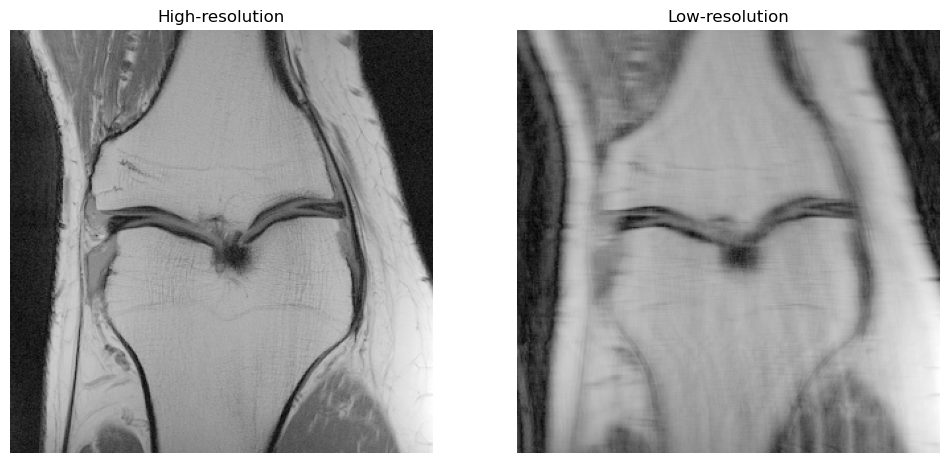

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Load high- and low-resolution images
hr = np.load('PreprocessedMC4fold/multicoil_train/973/high_resolution/20.npy')
lr = np.load('PreprocessedMC4fold/multicoil_train/973/low_resolution/20.npy')

print("High-res shape:", hr.shape, "Low-res shape:", lr.shape)
print("High-res min/max:", hr.min(), hr.max())
print("Low-res min/max:", lr.min(), lr.max())

# Apply log transformation with a small constant to avoid log(0)
hr_log = np.log(hr + 1e-5)
lr_log = np.log(lr + 1e-5)

# Calculate global min and max for consistent color scaling
global_min = min(hr_log.min(), lr_log.min())
global_max = max(hr_log.max(), lr_log.max())

# Plot only the high-resolution and low-resolution images
plt.figure(figsize=(12, 12))

# High-resolution image
plt.subplot(1, 2, 1)
plt.imshow(hr_log, cmap='gray')
plt.title('High-resolution')
plt.axis('off')

# Low-resolution image
plt.subplot(1, 2, 2)
plt.imshow(lr_log, cmap='gray')
plt.title('Low-resolution')
plt.axis('off')
# 
# # Difference image
# plt.subplot(1, 4, 3)


plt.show()

# Create Val data to 4 fold acceleration

In [12]:
from fastmri.data.subsample import RandomMaskFunc
from fastmri.data import transforms as T
import fastmri
import h5py
import numpy as np
from Utils.Crop_to_fixed_size2D import crop_to_fixed_size
import os
import glob

# Path to directory containing validation files
val_input_dir = r'D:\Base de Datos\Multi Coil\knee_multicoil_val\multicoil_val'

# Get a list of all .h5 files in the validation directory
val_files = glob.glob(os.path.join(val_input_dir, '*.h5'))

# Base path for output
val_output_base_path = 'PreprocessedMC4fold/multicoil_val'

# Iterate through each file in the validation list
for file_idx, fname_val in enumerate(val_files, start=1):
    # Define the output path for the current file by replacing "1" with the current index
    output_base_path = os.path.join(val_output_base_path, str(file_idx))

    # Create directories for high- and low-resolution images
    high_res_output_path = os.path.join(output_base_path, 'high_resolution')
    low_res_output_path = os.path.join(output_base_path, 'low_resolution')
    os.makedirs(high_res_output_path, exist_ok=True)
    os.makedirs(low_res_output_path, exist_ok=True)

    # Load data from the current file
    with h5py.File(fname_val, 'r') as f:
        kspace_VAL = np.array(f.get('kspace'))
        high_resolution_VAL = np.array(f.get('reconstruction_rss'))

    # Create a mask function
    mask_func = RandomMaskFunc(center_fractions=[0.08], accelerations=[4])

    # Process each slice in kspace_VAL
    for idx, slice_kspace in enumerate(kspace_VAL):
        # Convert from numpy array to tensor and apply the mask
        slice_kspace_tensor = T.to_tensor(slice_kspace)
        masked_kspace, mask, _ = T.apply_mask(slice_kspace_tensor, mask_func)

        # Initialize a list to store both processed high and low resolution images
        list_output = []

        # Process both masked (low-resolution) and unmasked (high-resolution) images
        for i in [masked_kspace, slice_kspace_tensor]:
            sampled_image = fastmri.ifft2c(i)
            sampled_image_abs = fastmri.complex_abs(sampled_image)
            sampled_image_rss = fastmri.rss(sampled_image_abs, dim=0)
            sampled_image_rss_crop = crop_to_fixed_size(sampled_image_rss)
            list_output.append(sampled_image_rss_crop)

        # Save each high-resolution and low-resolution slice as separate files
        np.save(os.path.join(high_res_output_path, f'{idx}.npy'), list_output[1])  # High-resolution
        np.save(os.path.join(low_res_output_path, f'{idx}.npy'), list_output[0])   # Low-resolution

    # Print a message indicating the file has finished processing
    print(f"Finished processing validation file {file_idx}: {fname_val}")


Finished processing validation file 1: D:\Base de Datos\Multi Coil\knee_multicoil_val\multicoil_val\file1000000.h5
Finished processing validation file 2: D:\Base de Datos\Multi Coil\knee_multicoil_val\multicoil_val\file1000007.h5
Finished processing validation file 3: D:\Base de Datos\Multi Coil\knee_multicoil_val\multicoil_val\file1000017.h5
Finished processing validation file 4: D:\Base de Datos\Multi Coil\knee_multicoil_val\multicoil_val\file1000026.h5
Finished processing validation file 5: D:\Base de Datos\Multi Coil\knee_multicoil_val\multicoil_val\file1000031.h5
Finished processing validation file 6: D:\Base de Datos\Multi Coil\knee_multicoil_val\multicoil_val\file1000033.h5
Finished processing validation file 7: D:\Base de Datos\Multi Coil\knee_multicoil_val\multicoil_val\file1000041.h5
Finished processing validation file 8: D:\Base de Datos\Multi Coil\knee_multicoil_val\multicoil_val\file1000052.h5
Finished processing validation file 9: D:\Base de Datos\Multi Coil\knee_multicoi

# Create train data to 8 fold acceleration

In [1]:
from fastmri.data.subsample import RandomMaskFunc
from fastmri.data import transforms as T
import fastmri
import h5py
import numpy as np
from Utils.Crop_to_fixed_size2D import crop_to_fixed_size
import os
import glob

# Path to directory containing training files
input_dir = r'D:\Base de Datos\Multi Coil\knee_multicoil_train'

# Get a list of all .h5 files in the directory
train_files = glob.glob(os.path.join(input_dir, '*.h5'))

# Base path for output
base_output_path = 'PreprocessedMC8fold/multicoil_train'

# Iterate through each file in the list
for file_idx, fname_train in enumerate(train_files, start=1):
    # Define the output path for the current file by replacing "1" with the current index
    output_base_path = os.path.join(base_output_path, str(file_idx))

    # Create directories for high- and low-resolution images
    high_res_output_path = os.path.join(output_base_path, 'high_resolution')
    low_res_output_path = os.path.join(output_base_path, 'low_resolution')
    os.makedirs(high_res_output_path, exist_ok=True)
    os.makedirs(low_res_output_path, exist_ok=True)

    # Load data from the current file
    with h5py.File(fname_train, 'r') as f:
        kspace_TRAIN = np.array(f.get('kspace'))

    # Create a mask function
    mask_func = RandomMaskFunc(center_fractions=[0.04], accelerations=[8])

    # Process each slice in kspace_TRAIN
    for idx, slice_kspace in enumerate(kspace_TRAIN):
        # Convert from numpy array to tensor and apply the mask
        slice_kspace_tensor = T.to_tensor(slice_kspace)
        masked_kspace, mask, _ = T.apply_mask(slice_kspace_tensor, mask_func)

        # Initialize a list to store both processed high and low resolution images
        list_output = []

        # Process both masked (low-resolution) and unmasked (high-resolution) images
        for i in [masked_kspace, slice_kspace_tensor]:
            sampled_image = fastmri.ifft2c(i)
            sampled_image_abs = fastmri.complex_abs(sampled_image)
            sampled_image_rss = fastmri.rss(sampled_image_abs, dim=0)
            sampled_image_rss_crop = crop_to_fixed_size(sampled_image_rss)
            list_output.append(sampled_image_rss_crop)

        # Save each high-resolution and low-resolution slice as separate files
        np.save(os.path.join(high_res_output_path, f'{idx}.npy'), list_output[1])  # High-resolution
        np.save(os.path.join(low_res_output_path, f'{idx}.npy'), list_output[0])   # Low-resolution

    # Print a message indicating the file has finished processing
    print(f"Finished processing file {file_idx}: {fname_train}")


Finished processing file 1: D:\Base de Datos\Multi Coil\knee_multicoil_train\file1000001.h5
Finished processing file 2: D:\Base de Datos\Multi Coil\knee_multicoil_train\file1000002.h5
Finished processing file 3: D:\Base de Datos\Multi Coil\knee_multicoil_train\file1000003.h5
Finished processing file 4: D:\Base de Datos\Multi Coil\knee_multicoil_train\file1000005.h5
Finished processing file 5: D:\Base de Datos\Multi Coil\knee_multicoil_train\file1000010.h5
Finished processing file 6: D:\Base de Datos\Multi Coil\knee_multicoil_train\file1000012.h5
Finished processing file 7: D:\Base de Datos\Multi Coil\knee_multicoil_train\file1000015.h5
Finished processing file 8: D:\Base de Datos\Multi Coil\knee_multicoil_train\file1000021.h5
Finished processing file 9: D:\Base de Datos\Multi Coil\knee_multicoil_train\file1000023.h5
Finished processing file 10: D:\Base de Datos\Multi Coil\knee_multicoil_train\file1000027.h5
Finished processing file 11: D:\Base de Datos\Multi Coil\knee_multicoil_train\f

In [2]:
from fastmri.data.subsample import RandomMaskFunc
from fastmri.data import transforms as T
import fastmri
import h5py
import numpy as np
from Utils.Crop_to_fixed_size2D import crop_to_fixed_size
import os
import glob

# Path to directory containing validation files
val_input_dir = r'D:\Base de Datos\Multi Coil\knee_multicoil_val\multicoil_val'

# Base path for output (updated to PreprocessedMC8fold)
val_output_base_path = 'PreprocessedMC8fold/multicoil_val'

# Get a list of all .h5 files in the validation directory
val_files = glob.glob(os.path.join(val_input_dir, '*.h5'))

# Iterate through each file in the validation list
for file_idx, fname_val in enumerate(val_files, start=1):
    # Define the output path for the current file by replacing "1" with the current index
    output_base_path = os.path.join(val_output_base_path, str(file_idx))

    # Create directories for high- and low-resolution images
    high_res_output_path = os.path.join(output_base_path, 'high_resolution')
    low_res_output_path = os.path.join(output_base_path, 'low_resolution')
    os.makedirs(high_res_output_path, exist_ok=True)
    os.makedirs(low_res_output_path, exist_ok=True)

    # Load data from the current file
    with h5py.File(fname_val, 'r') as f:
        kspace_VAL = np.array(f.get('kspace'))
        high_resolution_VAL = np.array(f.get('reconstruction_rss'))

    # Create a mask function
    mask_func = RandomMaskFunc(center_fractions=[0.04], accelerations=[8])

    # Process each slice in kspace_VAL
    for idx, slice_kspace in enumerate(kspace_VAL):
        # Convert from numpy array to tensor and apply the mask
        slice_kspace_tensor = T.to_tensor(slice_kspace)
        masked_kspace, mask, _ = T.apply_mask(slice_kspace_tensor, mask_func)

        # Initialize a list to store both processed high and low resolution images
        list_output = []

        # Process both masked (low-resolution) and unmasked (high-resolution) images
        for i in [masked_kspace, slice_kspace_tensor]:
            sampled_image = fastmri.ifft2c(i)
            sampled_image_abs = fastmri.complex_abs(sampled_image)
            sampled_image_rss = fastmri.rss(sampled_image_abs, dim=0)
            sampled_image_rss_crop = crop_to_fixed_size(sampled_image_rss)
            list_output.append(sampled_image_rss_crop)

        # Save each high-resolution and low-resolution slice as separate files
        np.save(os.path.join(high_res_output_path, f'{idx}.npy'), list_output[1])  # High-resolution
        np.save(os.path.join(low_res_output_path, f'{idx}.npy'), list_output[0])   # Low-resolution

    # Print a message indicating the file has finished processing
    print(f"Finished processing validation file {file_idx}: {fname_val}")


ModuleNotFoundError: No module named 'Utils'

High-res shape: (320, 320) Low-res shape: (320, 320)
High-res min/max: 4.253351e-06 0.0002578852
Low-res min/max: 3.2041282e-06 0.00019219804


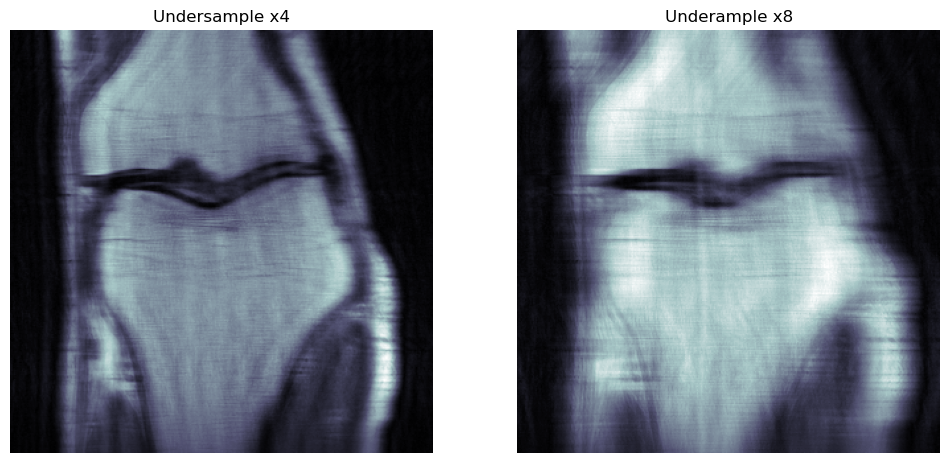

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Load high- and low-resolution images
hr = np.load('C:/Users/garci/PycharmProjects/FastTakitoMulticoil/PreprocessedMC4fold/multicoil_train/20/low_resolution/20.npy')

lr = np.load('C:/Users/garci/PycharmProjects/FastTakitoMulticoil/PreprocessedMC8fold/multicoil_train/20/low_resolution/20.npy')



print("High-res shape:", hr.shape, "Low-res shape:", lr.shape)
print("High-res min/max:", hr.min(), hr.max())
print("Low-res min/max:", lr.min(), lr.max())

# Apply log transformation with a small constant to avoid log(0)
hr_log = np.log(hr + 1e-1)
lr_log = np.log(lr + 1e-1)

# Calculate global min and max for consistent color scaling
global_min = min(hr_log.min(), lr_log.min())
global_max = max(hr_log.max(), lr_log.max())

# Plot only the high-resolution and low-resolution images
plt.figure(figsize=(12, 12))

# High-resolution image
plt.subplot(1, 2, 1)
plt.imshow(hr_log, cmap='bone')
plt.title('Undersample x4')
plt.axis('off')

# Low-resolution image
plt.subplot(1, 2, 2)
plt.imshow(lr_log, cmap='bone')
plt.title('Underample x8')
plt.axis('off')
# 
# # Difference image
# plt.subplot(1, 4, 3)


plt.show()